## Week 3 : SVM classifier exercise solutions

#### Import Packages

In [1]:
import pandas as pd 
import numpy as np 

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

#### Load data 

In [2]:
data = pd.read_csv('human_activity_recognition.csv')
print("Dimensions: ", data.shape)
data[:2]

Dimensions:  (7352, 563)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING


In [3]:
data.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [4]:
# Find the unique columns by splitting the columns based on '-'
pd.unique(data.columns.str.split('-').str[0])

array(['tBodyAcc', 'tGravityAcc', 'tBodyAccJerk', 'tBodyGyro',
       'tBodyGyroJerk', 'tBodyAccMag', 'tGravityAccMag',
       'tBodyAccJerkMag', 'tBodyGyroMag', 'tBodyGyroJerkMag', 'fBodyAcc',
       'fBodyAccJerk', 'fBodyGyro', 'fBodyAccMag', 'fBodyBodyAccJerkMag',
       'fBodyBodyGyroMag', 'fBodyBodyGyroJerkMag',
       'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject',
       'Activity'], dtype=object)

### Exploratory Data Analysis

<AxesSubplot:>

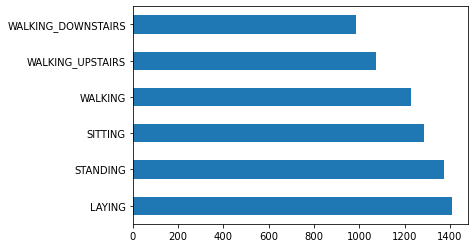

In [5]:
data["Activity"].value_counts().plot(kind='barh')

Class distribution looks good.

In [6]:
data.isnull().sum().sum()

0

The data has no missing values

In [7]:
data.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [28]:
max_df = data.drop(columns=['Activity']).max()
max_df[max_df <0.8]

tGravityAcc-arCoeff()-Z,1             0.648774
tGravityAcc-arCoeff()-Z,3             0.585769
tBodyAccJerk-max()-Y                  0.624373
tBodyAccJerk-energy()-Y               0.634415
tBodyGyro-mean()-X                    0.738953
fBodyAccJerk-mean()-Y                 0.646809
fBodyAccJerk-energy()-Y               0.634320
fBodyAccJerk-iqr()-Y                  0.641321
fBodyAccJerk-meanFreq()-Z             0.678628
fBodyAccJerk-kurtosis()-X             0.660042
fBodyAccJerk-bandsEnergy()-1,8.1      0.702928
fBodyAccJerk-bandsEnergy()-33,40.1    0.632415
fBodyGyro-min()-X                     0.465197
fBodyGyro-min()-Y                     0.794498
fBodyGyro-maxInds-Z                   0.655172
angle(Y,gravityMean)                  0.478157
dtype: float64

In [29]:
max_df[max_df > 1]

subject    30.0
dtype: float64

In [30]:
min_df = data.drop(columns=['Activity']).min()
min_df[min_df < -1]

Series([], dtype: float64)

In [31]:
min_df[min_df > -0.8]

tBodyAcc-arCoeff()-Z,2        -0.753754
tGravityAcc-mean()-Y          -0.535222
tGravityAcc-max()-Y           -0.493874
tGravityAcc-min()-Y           -0.568157
tGravityAcc-arCoeff()-Z,2     -0.617636
tGravityAcc-arCoeff()-Z,4     -0.554000
tBodyAccJerk-min()-Y          -0.746907
tBodyAccJerk-arCoeff()-Z,2    -0.799069
tBodyGyroJerk-min()-Z         -0.759790
tBodyGyroJerk-arCoeff()-Y,3   -0.773597
subject                        1.000000
dtype: float64

All features seem to be normalized already and are mostly in the range of (-1, 1) except the feature subject which can be dropped. 

In [8]:
X = data.drop(columns = ['Activity', 'subject'])
y = data['Activity']

#### Splitting the dataset to train and test: 

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [32]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y_train)
y_train_encoded = encoder.transform(y_train)

In [36]:
list(encoder.classes_)

['LAYING',
 'SITTING',
 'STANDING',
 'WALKING',
 'WALKING_DOWNSTAIRS',
 'WALKING_UPSTAIRS']

In [38]:
y_test_encoded = encoder.transform(y_test)

#### Linear kernel

C = 0.001

In [50]:
svc = SVC(kernel='linear', C=0.001) #The lower the C parameter, the softer the margin
svc.fit(X_train, y_train_encoded)
print("Training set accuracy score: ", round(accuracy_score(y_train_encoded, svc.predict(X_train)), 4))
print("Testing set accuracy score: ", round(accuracy_score(y_test_encoded , svc.predict(X_test)), 4))

Training set accuracy score:  0.9111
Testing set accuracy score:  0.9151


C = 1

In [48]:
svc = SVC(kernel='linear', C= 1)
svc.fit(X_train, y_train_encoded)
print("Training set accuracy score: ", round(accuracy_score(y_train_encoded, svc.predict(X_train)), 4))
print("Testing set accuracy score: ", round(accuracy_score(y_test_encoded , svc.predict(X_test)), 4))

Training set accuracy score:  0.9946
Testing set accuracy score:  0.9859


C = 100

In [49]:
svc = SVC(kernel='linear', C= 100)
svc.fit(X_train, y_train_encoded)
print("Training set accuracy score: ", round(accuracy_score(y_train_encoded, svc.predict(X_train)), 4))
print("Testing set accuracy score: ", round(accuracy_score(y_test_encoded , svc.predict(X_test)), 4))

Training set accuracy score:  1.0
Testing set accuracy score:  0.9744


The optimal value of C for SVM classifier with a linear model is 1 as the accuracy is good for both the training and testing datasets 

#### RBF kernel

C = 0.01

In [39]:
svc = SVC(kernel='rbf', C = 0.01)
svc.fit(X_train, y_train_encoded)
print("Training set accuracy score: ", round(accuracy_score(y_train_encoded, svc.predict(X_train)), 4))
print("Testing set accuracy score: ", round(accuracy_score(y_test_encoded , svc.predict(X_test)), 4))

Training set accuracy score:  0.98
Testing set accuracy score:  0.97


C = 1

In [51]:
svc = SVC(kernel='rbf', C = 1)
svc.fit(X_train, y_train_encoded)
print("Training set accuracy score: ", round(accuracy_score(y_train_encoded, svc.predict(X_train)), 4))
print("Testing set accuracy score: ", round(accuracy_score(y_test_encoded , svc.predict(X_test)), 4))

Training set accuracy score:  0.9762
Testing set accuracy score:  0.9684


C = 100

In [52]:
svc = SVC(kernel='rbf', C = 100)
svc.fit(X_train, y_train_encoded)
print("Training set accuracy score: ", round(accuracy_score(y_train_encoded, svc.predict(X_train)), 4))
print("Testing set accuracy score: ", round(accuracy_score(y_test_encoded , svc.predict(X_test)), 4))

Training set accuracy score:  0.9993
Testing set accuracy score:  0.9908


For SVM with radial kernel, the model accuracy is good for C = 100 for both the training and testing data.

#### Polynomial kernel

C = 0.01

In [53]:
svc = SVC(kernel='poly', degree = 3, C = 0.01)
svc.fit(X_train, y_train_encoded)
print("Training set accuracy score: ", round(accuracy_score(y_train_encoded, svc.predict(X_train)), 4))
print("Testing set accuracy score: ", round(accuracy_score(y_test_encoded , svc.predict(X_test)), 4))

Training set accuracy score:  0.8758
Testing set accuracy score:  0.8814


C = 1

In [42]:
svc = SVC(kernel='poly', degree = 3, C = 1)
svc.fit(X_train, y_train_encoded)
print("Training set accuracy score: ", round(accuracy_score(y_train_encoded, svc.predict(X_train)), 4))
print("Testing set accuracy score: ", round(accuracy_score(y_test_encoded , svc.predict(X_test)), 4))

Training set accuracy score:  0.99
Testing set accuracy score:  0.98


C = 100

In [54]:
svc = SVC(kernel='poly', degree = 3, C = 100)
svc.fit(X_train, y_train_encoded)
print("Training set accuracy score: ", round(accuracy_score(y_train_encoded, svc.predict(X_train)), 4))
print("Testing set accuracy score: ", round(accuracy_score(y_test_encoded , svc.predict(X_test)), 4))

Training set accuracy score:  1.0
Testing set accuracy score:  0.982


For SVM with polynomial kernel, the model accuracy is good for C = 1 for both the training and testing data.

#### Sigmoid kernel

C = 0.01

In [46]:
svc = SVC(kernel='sigmoid', C=0.01)
svc.fit(X_train, y_train_encoded)
print("Training set accuracy score: ", round(accuracy_score(y_train_encoded, svc.predict(X_train)), 4))
print("Testing set accuracy score: ", round(accuracy_score(y_test_encoded , svc.predict(X_test)), 4))

Training set accuracy score:  0.84
Testing set accuracy score:  0.82


C = 1

In [55]:
svc = SVC(kernel='sigmoid', C=1)
svc.fit(X_train, y_train_encoded)
print("Training set accuracy score: ", round(accuracy_score(y_train_encoded, svc.predict(X_train)), 4))
print("Testing set accuracy score: ", round(accuracy_score(y_test_encoded , svc.predict(X_test)), 4))

Training set accuracy score:  0.8402
Testing set accuracy score:  0.8172


C = 100

In [56]:
svc = SVC(kernel='sigmoid', C=100)
svc.fit(X_train, y_train_encoded)
print("Training set accuracy score: ", round(accuracy_score(y_train_encoded, svc.predict(X_train)), 4))
print("Testing set accuracy score: ", round(accuracy_score(y_test_encoded , svc.predict(X_test)), 4))

Training set accuracy score:  0.8825
Testing set accuracy score:  0.8569


For this dataset, rbf and linear kernels with a C value of 100 perform better than the other kernels and hyperparamters settings. 